<a href="https://colab.research.google.com/github/vinismachadoo/analise_de_cluster/blob/main/analise_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor_analyzer --quiet

In [2]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from factor_analyzer import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vinismachadoo/analise_de_cluster/main/atletas_australianos.csv', sep=';')

In [4]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'bfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

In [5]:
atletas_femininas = df[df['sex'] == 'f'].reset_index(drop=True)

In [6]:
fem_data = atletas_femininas.iloc[:,:-2]

In [7]:
chi_square_value_fem, p_value_fem = calculate_bartlett_sphericity(fem_data)
chi_square_value_fem, p_value_fem

(1669.5068937838762, 1.8713573431e-313)

In [8]:
_, kmo_model_fem = calculate_kmo(fem_data)
kmo_model_fem

0.6081642807157686

In [9]:
fem_data_scaled = StandardScaler().fit_transform(fem_data)
cov_mat_fem = np.cov(fem_data_scaled.T, bias=True)
pd.DataFrame(cov_mat_fem)

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.248515,0.854882,0.778364,-0.086220,-0.006526,-0.163352,-0.167841,0.063087,-0.028385,-0.020227
1,0.248515,1.000000,0.196764,0.205821,-0.027761,0.122050,0.109380,0.106142,-0.007314,-0.074300,0.048204
2,0.854882,0.196764,1.000000,0.903561,-0.124035,-0.025460,-0.259569,-0.234821,0.093657,-0.019257,-0.031596
3,0.778364,0.205821,0.903561,1.000000,-0.031793,0.128661,-0.169571,-0.147775,0.187467,-0.042118,0.079007
4,-0.086220,-0.027761,-0.124035,-0.031793,1.000000,0.144706,0.167647,0.144424,-0.048358,-0.154549,0.033060
5,-0.006526,0.122050,-0.025460,0.128661,0.144706,1.000000,0.660127,0.636756,0.733125,0.111858,0.844393
6,-0.163352,0.109380,-0.259569,-0.169571,0.167647,0.660127,1.000000,0.968184,0.351907,0.352872,0.712511
7,-0.167841,0.106142,-0.234821,-0.147775,0.144424,0.636756,0.968184,1.000000,0.339801,0.385147,0.710503
8,0.063087,-0.007314,0.093657,0.187467,-0.048358,0.733125,0.351907,0.339801,1.000000,0.609107,0.899828
9,-0.028385,-0.074300,-0.019257,-0.042118,-0.154549,0.111858,0.352872,0.385147,0.609107,1.000000,0.623528


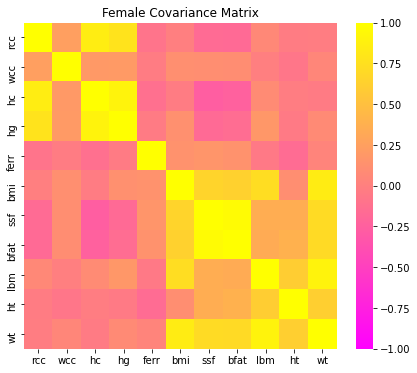

In [10]:
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(cov_mat_fem, cmap='spring', vmin=-1, vmax=1, ax=ax)
ax.set_xticklabels(fem_data.columns)
ax.set_yticklabels(fem_data.columns)
ax.set_title('Female Covariance Matrix')

plt.show()

In [11]:
fa_fem = FactorAnalyzer(4, 'varimax')
fa_fem.fit(fem_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [12]:
evs_fem, _ = fa_fem.get_eigenvalues()
values_fem = {'Eigenvalues': evs_fem, 'Explanation': [ev*100/sum(evs_fem) for ev in evs_fem]}
pd.DataFrame(values_fem)

,Eigenvalues,Explanation
0,4.091319,37.193807
1,2.876973,26.154303
2,1.341806,12.198235
3,0.982033,8.927569
4,0.735492,6.686287
5,0.659397,5.994521
6,0.210403,1.912754
7,0.069541,0.632186
8,0.029219,0.265629
9,0.002407,0.021879


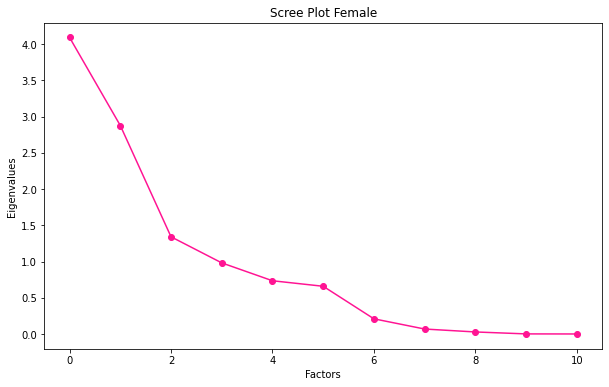

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(evs_fem, '-o', c='deeppink', )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Scree Plot Female')
ax.set_xlabel('Factors')
ax.set_ylabel('Eigenvalues')

plt.show()

In [14]:
communalities_fem = fa_fem.get_communalities()
pd.DataFrame(communalities_fem, index = fem_data.columns, columns=['Communalities'])

,Communalities
rcc,0.761736
wcc,0.099683
hc,0.980268
hg,0.839091
ferr,0.077589
bmi,0.996468
ssf,0.978471
bfat,0.963548
lbm,0.997421
ht,0.996595


In [15]:
loadings_fem = fa_fem.loadings_
pd.DataFrame(loadings_fem, index = fem_data.columns)

,0,1,2,3
rcc,-0.016395,0.864686,-0.085467,0.080510
wcc,-0.002870,0.267354,0.138636,-0.094747
hc,0.011139,0.965515,-0.178974,0.126066
hg,0.142037,0.895564,-0.128668,0.018064
ferr,0.020878,-0.057084,0.143958,-0.230587
bmi,0.838563,0.083248,0.428690,-0.320274
ssf,0.309432,-0.095343,0.934038,-0.034716
bfat,0.291407,-0.082260,0.933699,0.008357
lbm,0.944182,0.064109,0.077307,0.309606
ht,0.334482,-0.082123,0.290834,0.890724


In [16]:
factor_variances_fem = fa_fem.get_factor_variance()
pd.DataFrame(factor_variances_fem, index = ['Variance','Proportional variances','Cumulative variances'])

,0,1,2,3
Variance,2.607028,2.590748,2.361590,1.129011
Proportional variances,0.237003,0.235523,0.214690,0.102637
Cumulative variances,0.237003,0.472525,0.687215,0.789853


In [17]:
pca = PCA(2)
fem_data_pca_scores = pca.fit_transform(fem_data_scaled)
fem_data_pca_components = pca.components_
pd.DataFrame(fem_data_pca_components.T, index = fem_data.columns)

,0,1
rcc,-0.082982,0.525235
wcc,0.028717,0.188009
hc,-0.102543,0.553423
hg,-0.044652,0.548822
ferr,0.053476,-0.083403
bmi,0.410265,0.111522
ssf,0.424321,-0.076782
bfat,0.421760,-0.069353
lbm,0.378207,0.189007
ht,0.284973,0.050563


In [18]:
fem_data_pca_scores = pd.concat([pd.DataFrame(fem_data_pca_scores), atletas_femininas['sport']], axis=1)

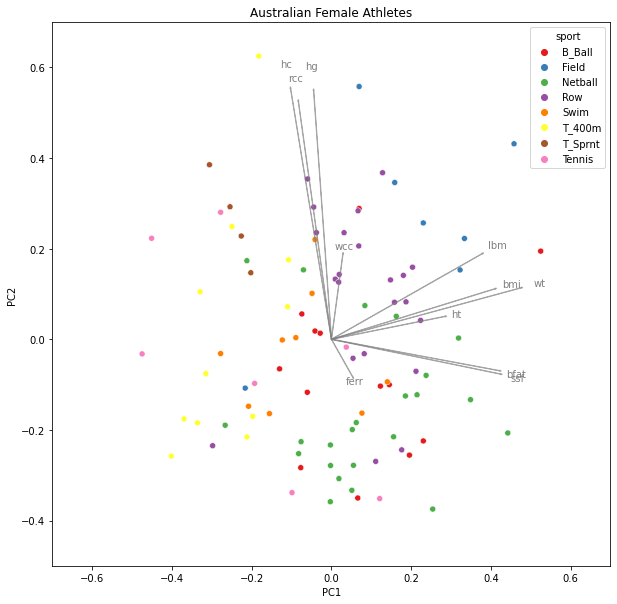

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x=fem_data_pca_scores[0]/(fem_data_pca_scores[0].max() - fem_data_pca_scores[0].min()), 
                y=fem_data_pca_scores[1]/(fem_data_pca_scores[1].max() - fem_data_pca_scores[1].min()), 
                data=fem_data_pca_scores, hue='sport', palette='Set1', ax=ax)

for i,j in enumerate(fem_data.columns):
  ax.arrow(0, 0, fem_data_pca_components[0][i], fem_data_pca_components[1][i], color='gray', alpha=0.6)
  ax.text(fem_data_pca_components[0][i]*1.1, fem_data_pca_components[1][i]*1.1, j, color='gray', ha='center', va='center')

ax.set_xlim(-0.7,0.7)
ax.set_ylim(-0.5,0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Australian Female Athletes')

plt.show()